In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)
%matplotlib inline
# reload module each time cell is run
%load_ext autoreload
%autoreload 2

In [34]:
from Model import RetirementModelClass

In [35]:
# a. setup (calling the __init__ method) 
model = RetirementModelClass(name='baseline',solmethod='egm')

# b. print
#print(model)

# c. solve
model.solve()

# d. simulate
model.simulate()

In [36]:
import figs
from transitions import age

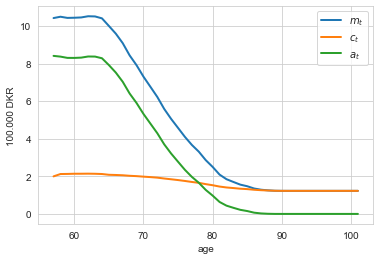

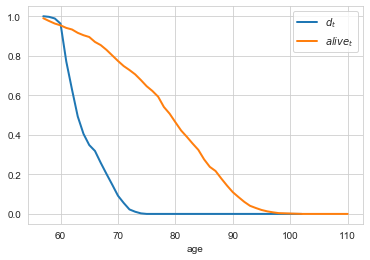

In [37]:
figs.lifecycle(model)
figs.lifecycle(model,['d','alive'])

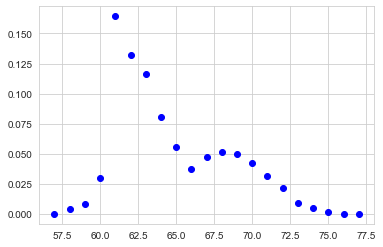

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from transitions import age
par = model.par
sim = model.sim

avg_probs = np.zeros(11)
for t in range(len(avg_probs)):
    avg_probs[t] = np.nanmean(sim.probs[t])
    
plt.plot(age(np.arange(par.Tr)),avg_probs,'bo')

In [21]:
workforce = np.nan*np.zeros(model.par.Tr)
retiring = np.zeros(model.par.Tr)
for t in range(len(workforce)):
    workforce[t] = np.count_nonzero(sim.d[t]==1)
    if t > 0:
        retiring[t] = np.count_nonzero(sim.d[t] - sim.d[t-1] == -1)
        
probs = retiring / workforce

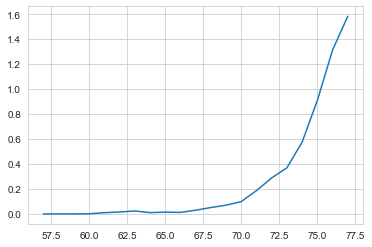

In [23]:
plt.plot(age(np.arange(model.par.Tr)),probs)

In [44]:
workforce

array([1000.,  988.,  969.,  939.,  790.,  677.,  562.,  488.,  444.,
        404.,  343.,  284.,  212.,  149.,   85.,   41.,   19.,    6.,
          2.,    1.,    1.])

In [45]:
retiring

array([  0.,   2.,   6.,  19., 143., 103., 109.,  66.,  39.,  37.,  50.,
        56.,  67.,  57.,  55.,  43.,  21.,  13.,   4.,   1.,   0.])

In [50]:
import numpy as np
retired = np.zeros(12)
dead = np.zeros(12)
for i in range(1,len(retired)+1):
    retired[i-1] = np.sum(model.sim.d[i] - model.sim.d[i-1] == -1)
    dead[i-1] = np.count_nonzero(np.isnan(model.sim.d[i]))

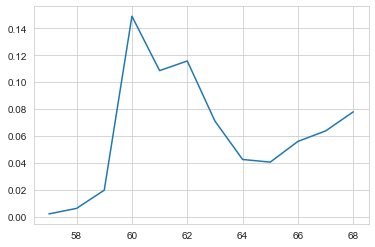

In [51]:
import matplotlib.pyplot as plt
import transitions
plt.plot(transitions.age(np.arange(12)), retired / (1000 - dead))

In [44]:
dead

array([ 10.,  23.,  34.,  40.,  51.,  58.,  71.,  82.,  87., 106., 121.,
       140.])

In [45]:
np.sum(retired / (1000 - dead))

0.7099889161281634

In [47]:
retired

array([  3.,   7.,  20., 124.,  94.,  98.,  65.,  42.,  37.,  50.,  55.,
        62.])

In [24]:
sol = model.sol
sol.c[35,2] - sol.c[35,3]

array([[ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0., nan],
       [ 0.,

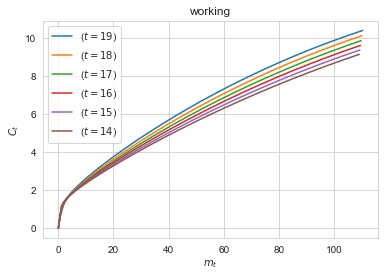

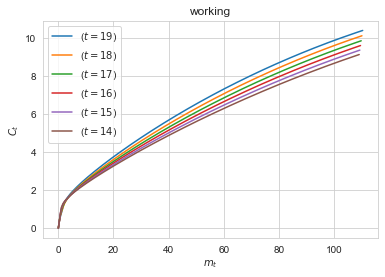

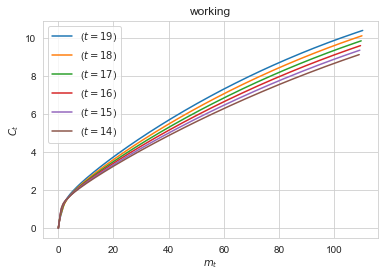

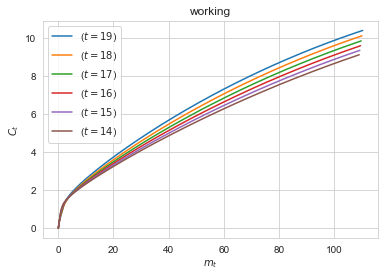

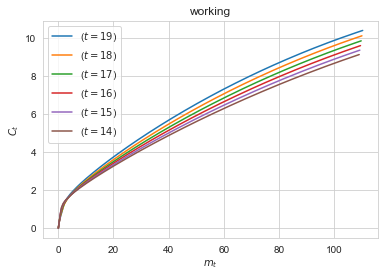

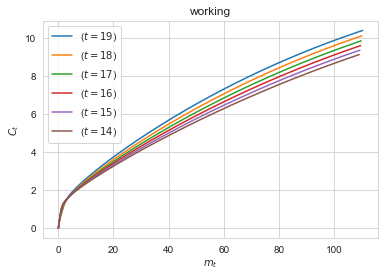

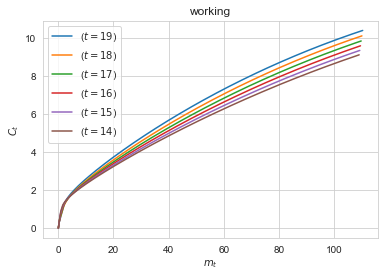

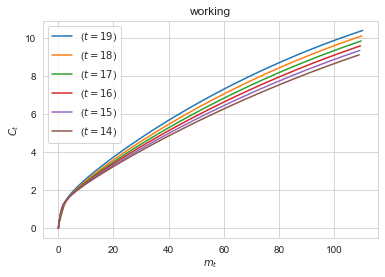

In [25]:
for st in model.par.states:
    figs.cons_choice(model,[19,18,17,16,15,14],st,choice='work')

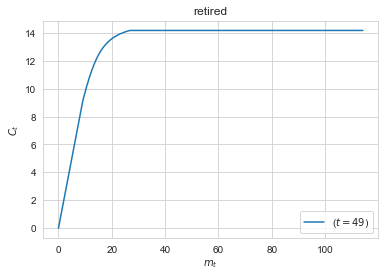

In [11]:
figs.cons_choice(model,[model.par.T-5],choice='retire')

In [83]:
#utility.inv_marg_func(model.sol.q[19],model.par)

In [84]:
#model.sol.c[15]

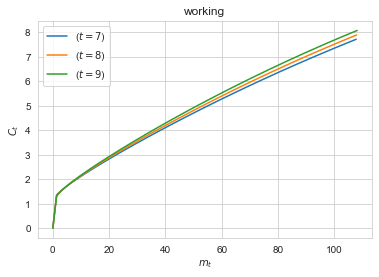

In [12]:
figs.cons_choice(model,[7,8,9],choice='work')